In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17136 entries, 0 to 17135
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  5304 non-null   object 
 1   Country/Region  17136 non-null  object 
 2   Lat             17136 non-null  float64
 3   Long            17136 non-null  float64
 4   Date            17136 non-null  object 
 5   Confirmed       17136 non-null  int64  
 6   Deaths          17136 non-null  int64  
 7   Recovered       17136 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.0+ MB


In [5]:
#feature having null value
df.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [6]:
#total number of null value in province /state
df['Province/State'].isnull().sum()

11832

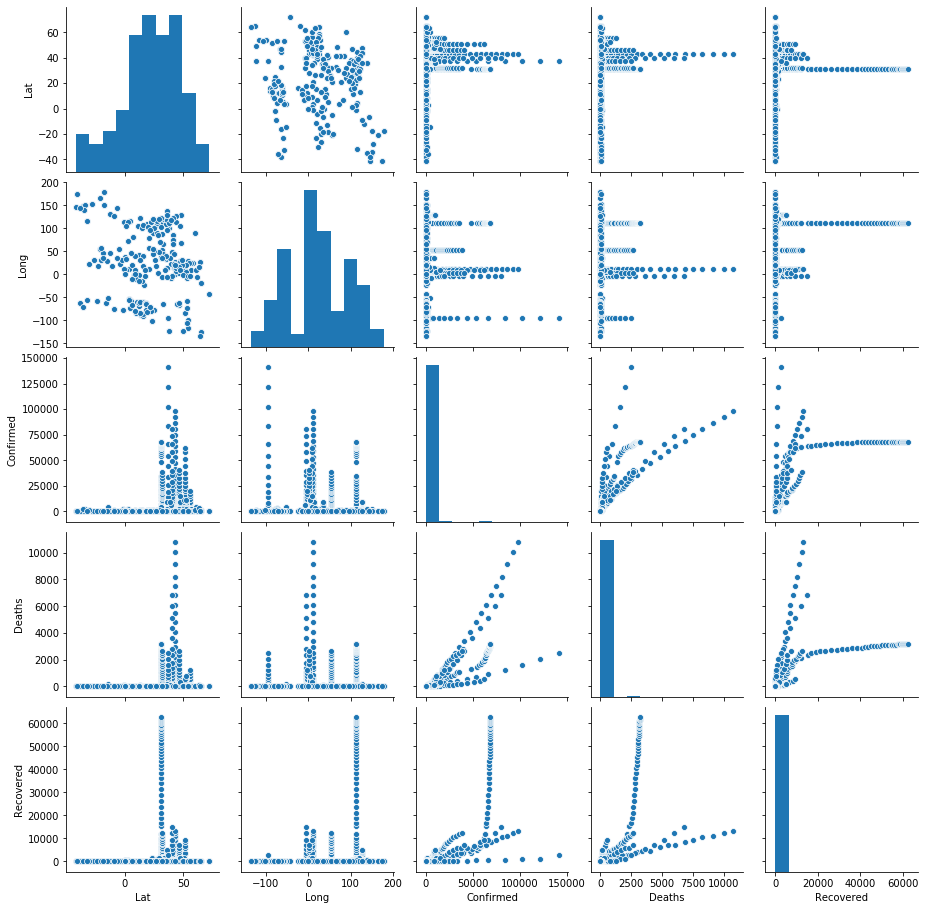

In [7]:
sns.pairplot(df)

In [8]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [9]:
df.isnull().sum()

Province/State    11832
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [10]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [11]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [12]:
#Total cases
df[['Confirmed','Deaths','Recovered']].sum()

Confirmed    8966031
Deaths        354308
Recovered    2743234
dtype: int64

In [13]:
#total number of Country 
df['Country/Region'].nunique()

177

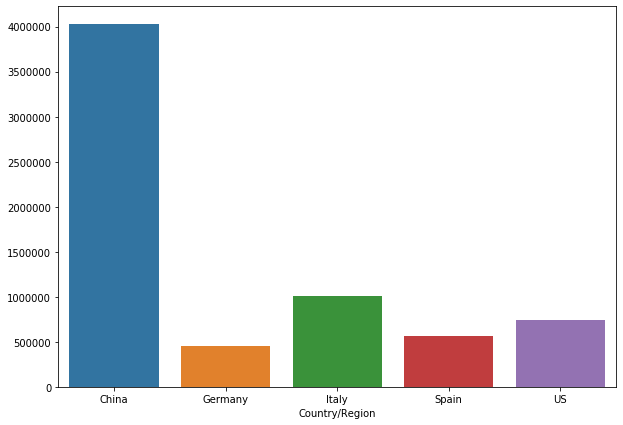

In [14]:
#top 5 country with confirmed cases
fig = plt.figure(figsize=(10,7))

confirmed_cases = df[df['Confirmed']>0]
confirmed_cases = confirmed_cases.groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head(5).reset_index().pivot_table(columns='Country/Region',values='Confirmed')
sns.barplot(data = confirmed_cases)

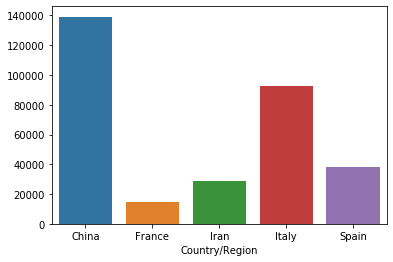

In [15]:
#top 5 country having highest death ratiofig = plt.figure(figsize=(10,7))

death_cases = df[df['Deaths']>0]
death_cases= death_cases.groupby('Country/Region').sum().sort_values('Deaths',ascending=False).reset_index().head(5)
death_cases = death_cases.pivot_table(columns='Country/Region',values='Deaths')
death_cases
sns.barplot(data=death_cases)

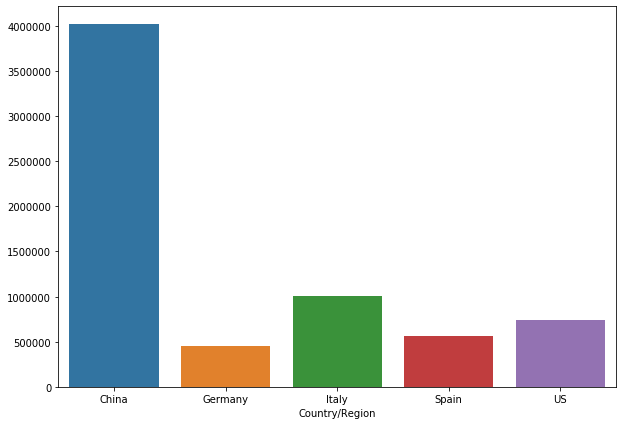

In [16]:
#top 5 country which have confirmed cases and recovered successfully
fig = plt.figure(figsize=(10,7))

confirmed_recovered = df[(df['Confirmed']>0) & (df['Recovered']>0)]
confirmed_recovered = confirmed_recovered.groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
confirmed_recovered =confirmed_recovered.reset_index().pivot_table(columns='Country/Region',values='Confirmed')
sns.barplot(data=confirmed_recovered)

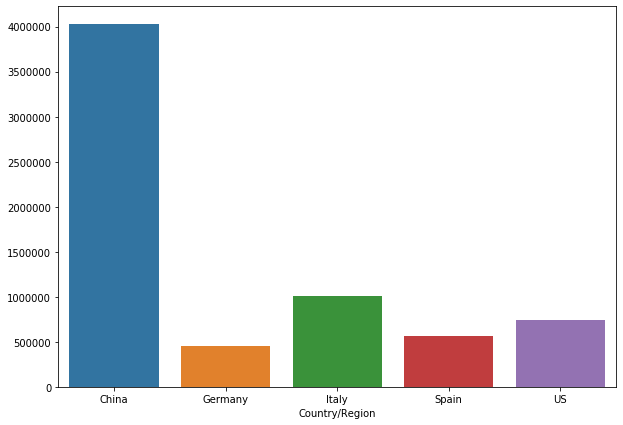

In [17]:
fig = plt.figure(figsize=(10,7))
sns.barplot(data=confirmed_cases)

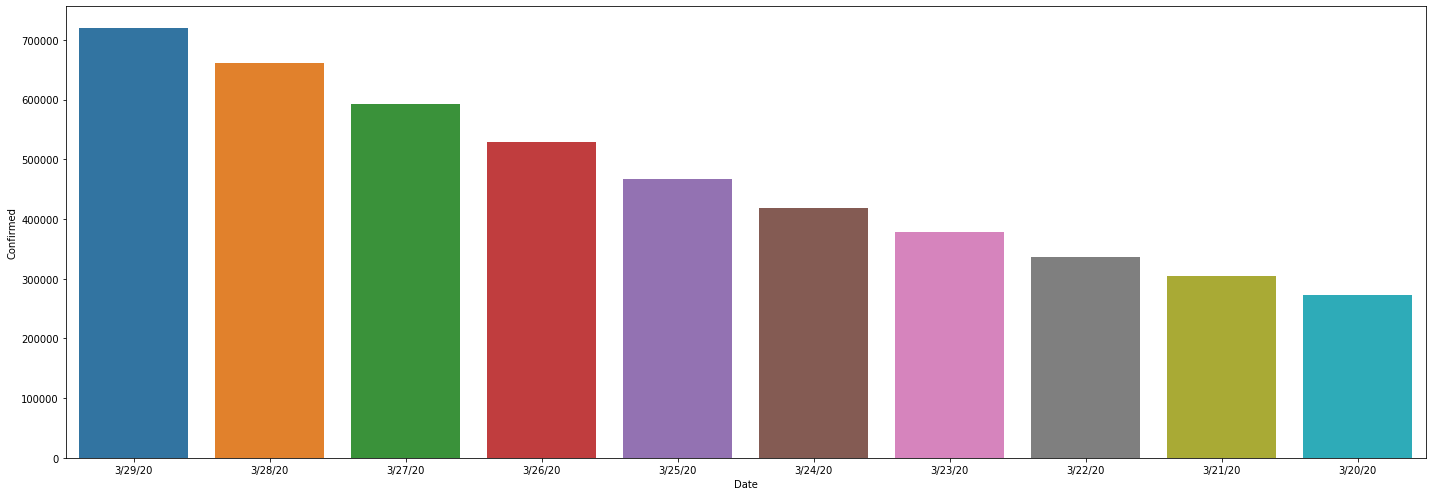

In [18]:
#top 10 day coronavirus case has been confirmed date
high_date = df[df['Confirmed']>0].groupby('Date').sum().sort_values('Confirmed',ascending=False).reset_index().sort_values(by='Confirmed',ascending=False).head(10)
fig = plt.figure(figsize=(20,7))
sns.barplot(x='Date',y='Confirmed',data=high_date)
plt.tight_layout()

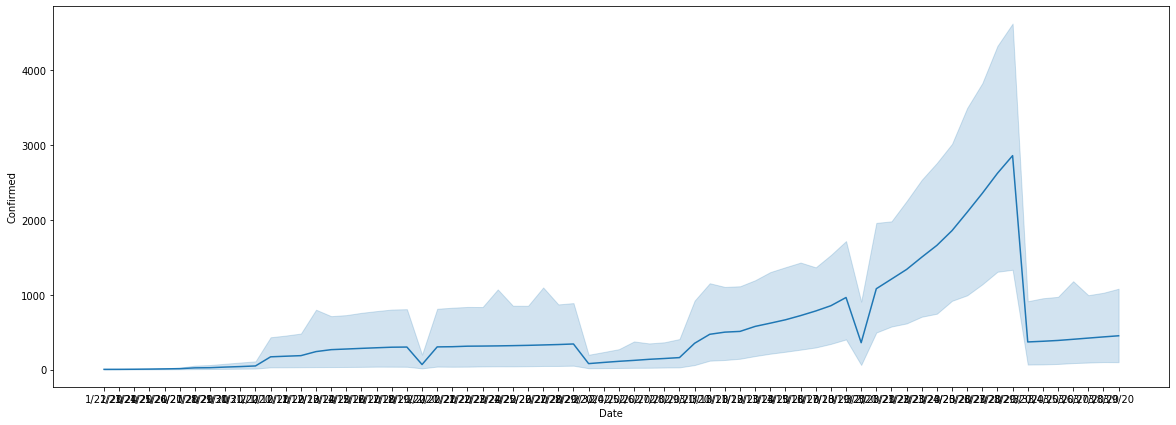

In [19]:
#how the virus ins increasing day by day
fig = plt.figure(figsize=(20,7))
sns.lineplot(x='Date',y='Confirmed',data=df)

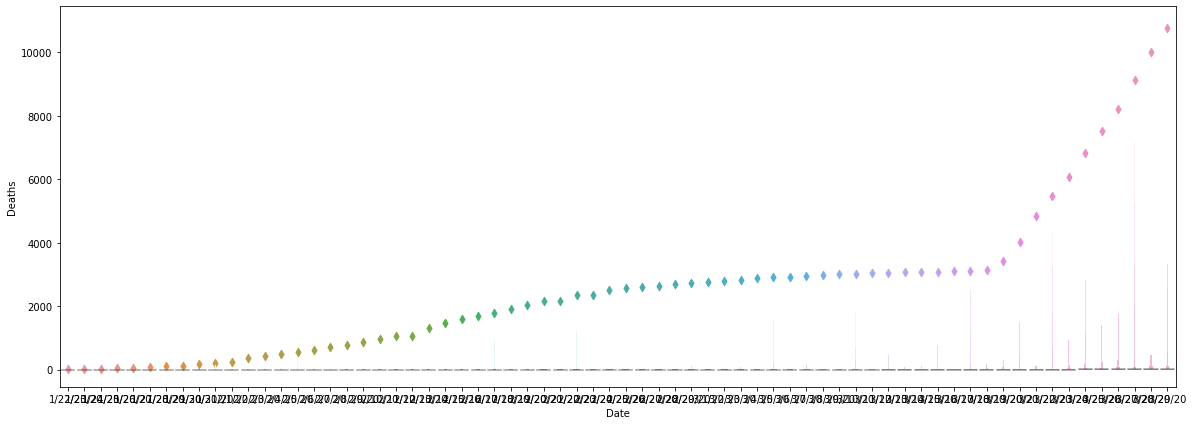

In [20]:
#death of person according to date
fig = plt.figure(figsize=(20,7))
sns.boxenplot(x='Date',y='Deaths',data=df,linewidth=2)